In [1]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

In [2]:
br29 = pd.read_csv("Data/br_29.csv")

br29_norm = pd.read_csv("Data/br_29_norm.csv")

hr29_norm = pd.read_csv("Data/hr_29_norm.csv")
st29_norm = pd.read_csv("Data/st_29_norm.csv")

In [3]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

## Dendrogram of 29 Day cycles

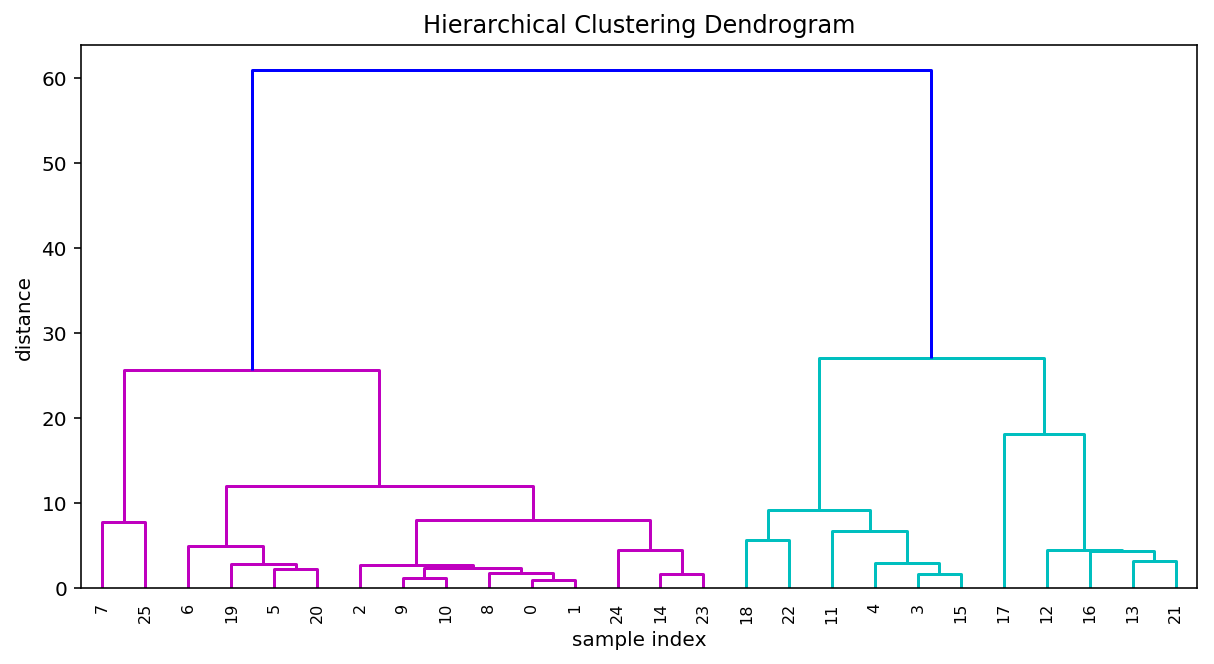

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree, set_link_color_palette
# Do the clustering
Z = linkage(br29.drop("cycle_day", axis =1).T, method='ward', metric='euclidean')
set_link_color_palette(['m', 'c', 'y', 'k'])
# Plot dendogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,# font size for the x axis labels
)

plt.show()
#cutree = cut_tree(Z, n_clusters=[2,3,4,10])
#cutree

### Different distance calculation methods
#euclidean, maximum, manhattan, canberra, binary, minkowski, pearson, spearman, kendall

### different clustering methods
#ward.D, ward.D2, single, complete, average, mcquitty, median, centroid

### custom metric

In [5]:
# If you want your own metric: Here we use spearman correlation
def my_metric(x, y):
    r = stats.pearsonr(x, y)[0]
    return 1 - r # correlation to distance: range 0 to 2

### linkage calculation and dendrogram plot

In [6]:
# Do the clustering    
def plot_dendro(timeSeries, method, metric, k, feature, cycle_length):
    %matplotlib inline
    Z = linkage(timeSeries,  method=method, metric=metric)
    with plt.style.context(('bmh')):
    # Plot dendogram
        set_link_color_palette(['m', 'c', 'y', 'k'])
        d = plt.figure(figsize=(15, 7))
        plt.title(str(feature+" "+str(cycle_length)+" Days "+str(method)+" "+str(metric)+" "+str(k)))
        plt.xlabel('cycle index')
        plt.ylabel('distance')
        dendrogram(Z,
            leaf_rotation=90., # rotates the x axis labels\
            leaf_font_size=8., # font size for the x axis labels\ 
            show_contracted=True)
    return d, Z

### k clusters

criterion:
 - inconsistent : If a cluster node and all its descendants have an inconsistent value less than or equal to t then all its leaf descendants belong to the same flat cluster. When no non-singleton cluster meets this criterion, every node is assigned to its own cluster. (Default)
 
 - distance : Forms flat clusters so that the originalobservations in each flat cluster have no greater a cophenetic distance than t.
 
 - maxclust : Finds a minimum threshold r so that the cophenetic distance between any two original observations in the same flat cluster is no more than r and no more than t flat clusters are formed.
 
 - monocrit : Forms a flat cluster from a cluster node c with index i when monocrit[j] <= t.
            For example, to threshold on the maximum mean distance as computed in the inconsistency matrix R with a threshold of 0.8 do:
        MR = maxRstat(Z, R, 3)
        cluster(Z, t=0.8, criterion='monocrit', monocrit=MR)
        
 - maxclust_monocrit : Forms a flat cluster from a non-singleton cluster node c when monocrit[i] <= r for all cluster indices i below and including c. r is minimized such that no more than t flat clusters are formed. monocrit must be monotonic. 
         For example, to minimize the threshold t on maximum inconsistency values so that no more than 3 flat clusters are formed, do:
        MI = maxinconsts(Z, R)
        cluster(Z, t=3, criterion='maxclust_monocrit', monocrit=MI)

In [7]:
def plot_clustered_ts(timeSeries, k,method, metric, anim, plot = True):
    %matplotlib inline
    from scipy.cluster.hierarchy import fcluster
    import math
    import time
    
    Z = linkage(timeSeries,  method=method, metric=metric)
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    #print(results)
    # check the results
    s = pd.Series(results)
    clusters = s.unique()
    if anim == True:
        %matplotlib
        
    fig = plt.figure(1, figsize = (15,10))
    for i, c in enumerate(clusters):
        
        cluster_indeces = s[s==c].index

        if plot:
            with plt.style.context(('bmh')):
                x = math.ceil(k/2)
                ax = fig.add_subplot(x,2,i+1)
                if anim == True:
                    axes = fig.add_subplot(x,2,i+1)
                    
                    for cluster_index in range(len(cluster_indeces)):
                        axes = plt.gca()
                        axes.set_ylim(-3, +3)
                        plt.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                        plt.draw()
                        plt.pause(0.1)
                        #plt.set_title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                        #plt.legend(frameon=False, loc='lower right', ncol=2)
                        
                else:
                    for cluster_index in range(len(cluster_indeces)):
                        ax.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                        plt.title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                        plt.legend(frameon=False, loc='lower right', ncol=2)
                
        else:
            print("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
    plt.close(1)
    return results

## cluster by the first n values only

In [8]:
def plot_clustered_ts_part(timeSeries, k,method, metric,n, anim, plot = True):
    %matplotlib inline
    from scipy.cluster.hierarchy import fcluster
    import math
    import time
    
    Z = linkage(timeSeries.T[:n].T,  method=method, metric=metric)
    # k Number of clusters I'd like to extract
    results = fcluster(Z, k, criterion='maxclust')
    #print(results)
    s = pd.Series(results)
    clusters = s.unique()
    if anim == True:
        %matplotlib
        
    fig = plt.figure(1, figsize = (15,10))
    for i, c in enumerate(clusters):
        
        cluster_indeces = s[s==c].index

        if plot:
            with plt.style.context(('bmh')):
                x = math.ceil(k/2)
                ax = fig.add_subplot(x,2,i+1)
                if anim == True:
                    axes = fig.add_subplot(x,2,i+1)
                    
                    for cluster_index in range(len(cluster_indeces)):
                        axes = plt.gca()
                        axes.set_ylim(-3, +3)
                        
                        plt.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                        plt.draw()
                        plt.pause(0.1)
                        #plt.set_title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                        #plt.legend(frameon=False, loc='lower right', ncol=2)
                        
                else:
                    for cluster_index in range(len(cluster_indeces)):
                        ax.plot(timeSeries.T.iloc[:,cluster_indeces[cluster_index]], marker = ".",label = cluster_indeces[cluster_index])
                        plt.title("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
                        plt.legend(frameon=False, loc='lower right', ncol=2)
                
        else:
            print("Cluster %d - number of entries %d" % (c, len(cluster_indeces)))
    plt.close(1)
    return results

In [9]:
feature = "Heart Rate (z-score)"
cycle_length = "29"
timeSeries = hr29_norm.drop("cycle_day", axis =1).T
k = 6
method = "complete"
metric = "braycurtis"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
clusters = plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



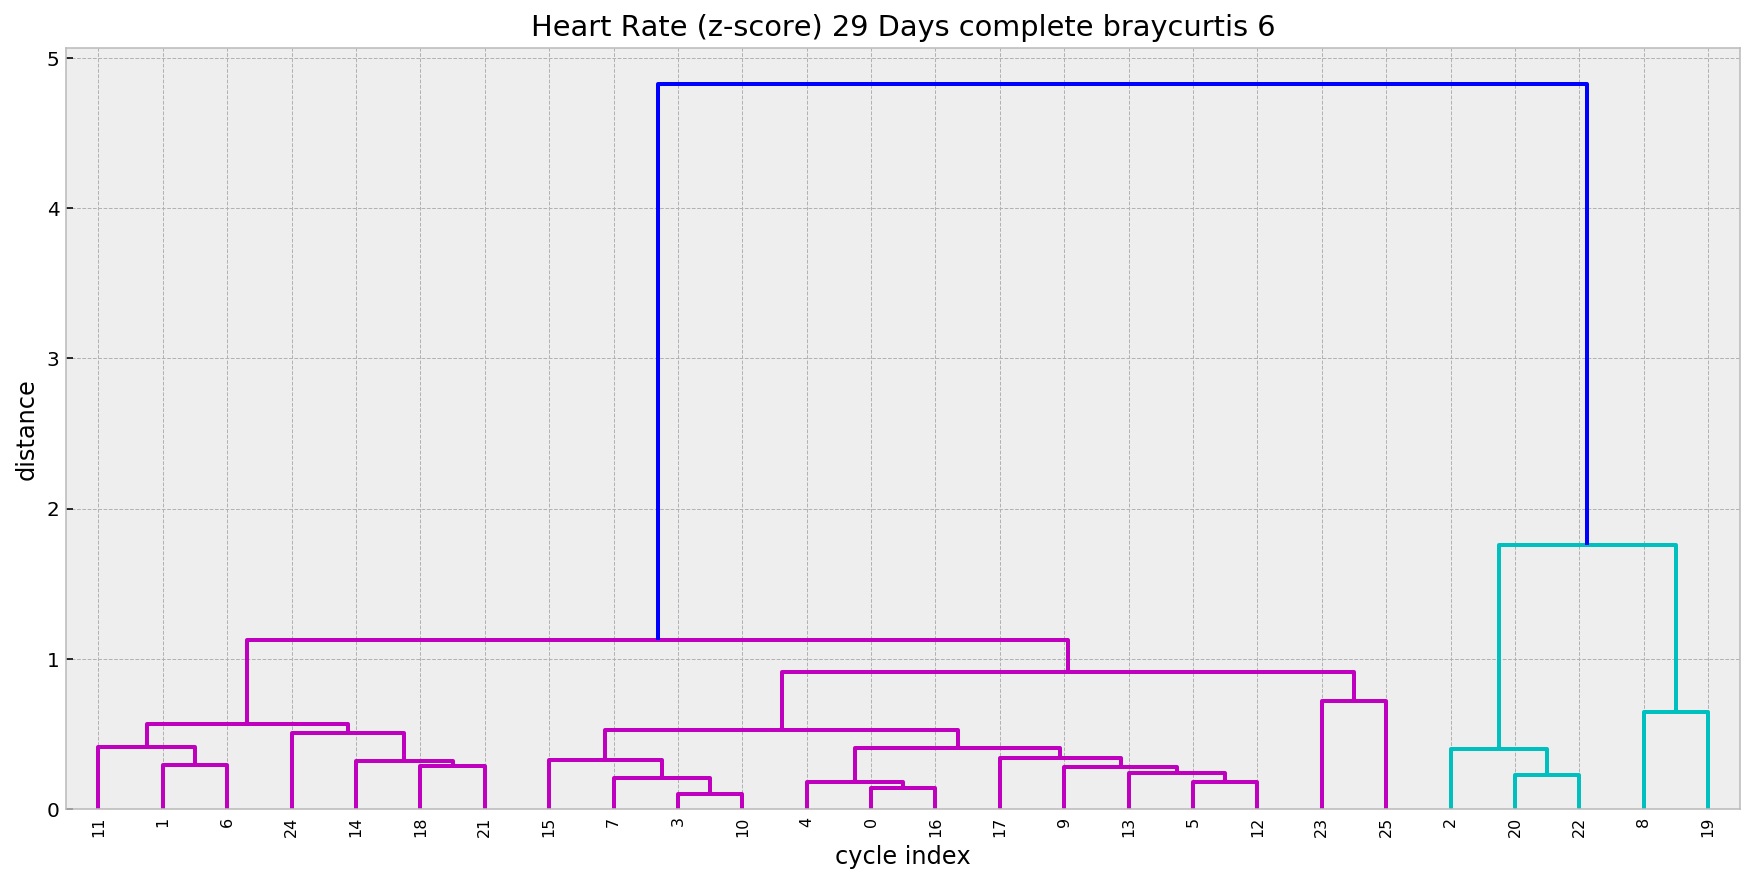

In [10]:
p = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)


In [11]:
clusters

array([2, 1, 5, 2, 2, 2, 1, 2, 6, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 6, 5, 1, 5,
       3, 1, 4], dtype=int32)

### dynamic time warping with time series of equal length

In [9]:
# If you want your own metric: Here we use spearman correlation
def dtw_metric(x, y):
    distance = dtw.distance(x,y)
    return distance # correlation to distance: range 0 to 2

In [10]:
def DTWDistance(s1, s2):
    DTW={}
    w = 5
    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [11]:
feature = "Heart Rate (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1).T
k = 6
w = 5
method = "complete"
metric = "braycurtis"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



array([5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 4, 2, 1, 5, 3, 2, 4, 4, 5, 5, 5, 2, 6,
       1, 4, 3], dtype=int32)

### heatmap of clustered cycles

In [22]:
def plot_heatmap(timeSeries, best_method, best_metric, cmap):
    ax = sns.clustermap(timeSeries, metric=best_metric,method=best_method, col_cluster = False,figsize=(12,10), cmap = cmap)
    plt.show()

#### Possible colormaps: 
    Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


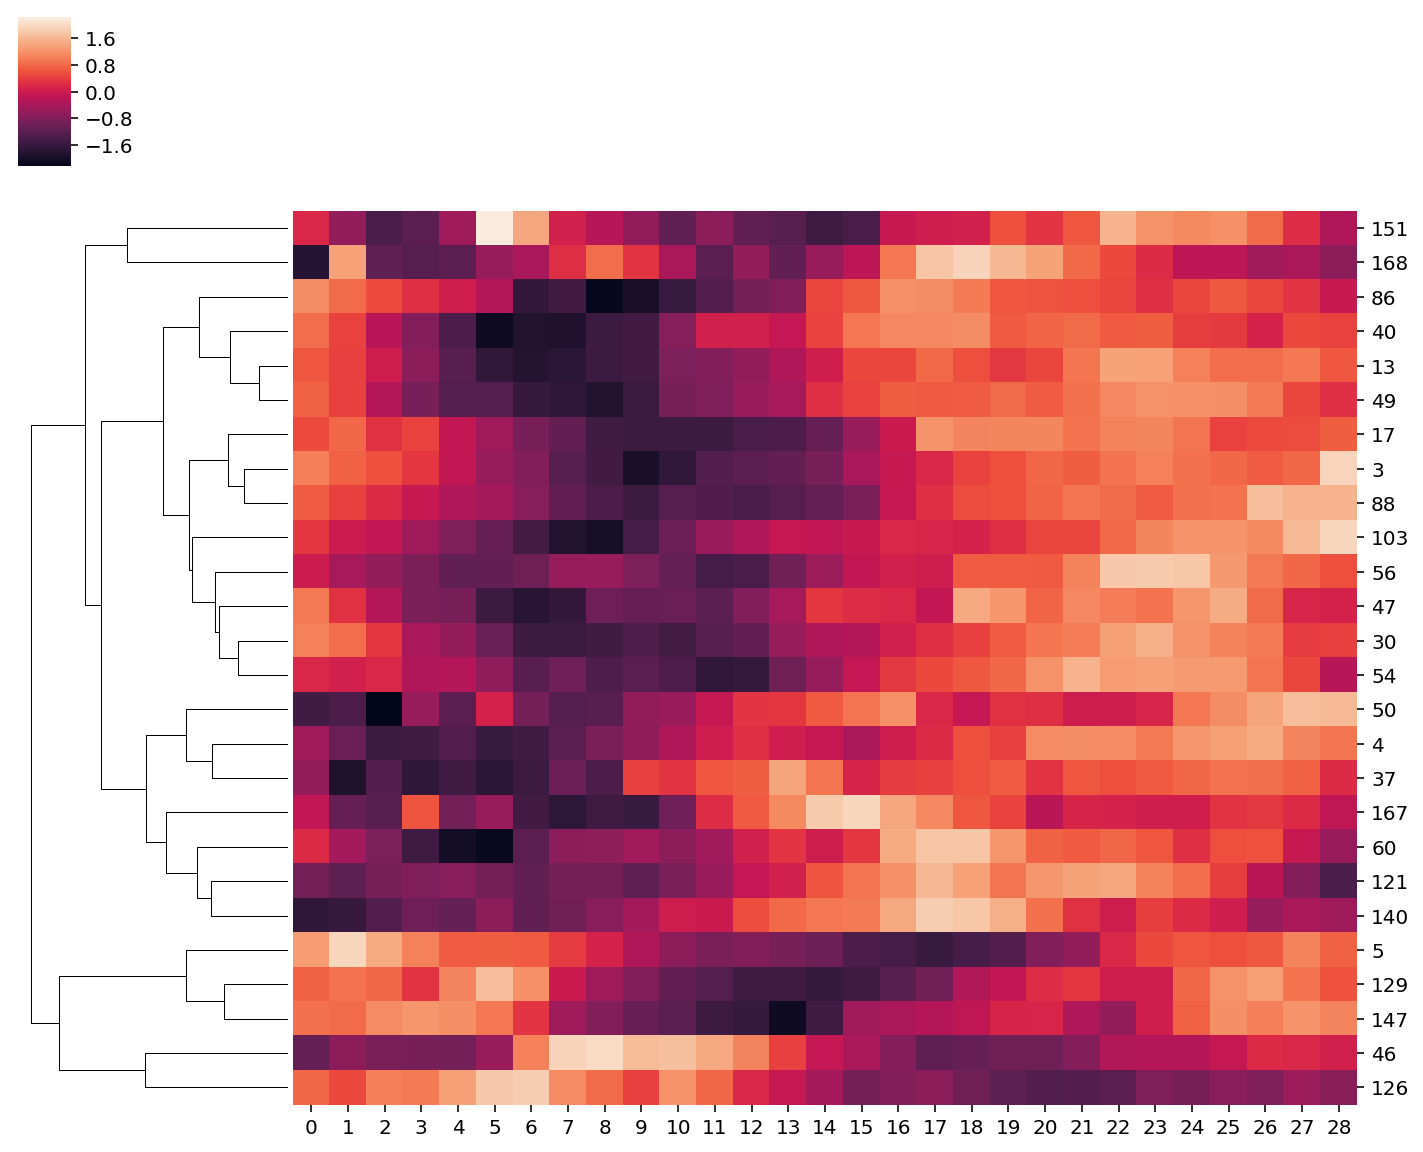

In [23]:
timeSeries = hr29_norm.drop("cycle_day", axis = 1).T
plot_heatmap(timeSeries, "complete", "euclidean", cmap = "rocket")

In [24]:
timeSeries = br29_norm.drop("cycle_day", axis = 1).T
plot_heatmap(timeSeries, "complete", "euclidean")

TypeError: plot_heatmap() missing 1 required positional argument: 'cmap'

In [25]:
timeSeries = br29_norm.drop("cycle_day", axis = 1).T
plot_heatmap(timeSeries, "ward", "euclidean")

TypeError: plot_heatmap() missing 1 required positional argument: 'cmap'

## plot of dendrogram and cluster (saved in PDF)

In [26]:
def print_dendro_cluster(timeSeries, method, metric, k, feature, cycle_length,anim = False, plot = True, save = False):
    

    # plot dendrogram
    d_plot = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
    
    # plot clustered time series
    c_plot = plot_clustered_ts(timeSeries.T, Z, k, anim= anim, plot=plot,)
    

    if save == True:
         #save figures in one pdf file
        pdf_name = str(feature)+"_"+str(cycle_length)+"_"+str(method)+"_"+str(metric)+"_"+str(k)+".pdf"
        import matplotlib.backends.backend_pdf
        pp = matplotlib.backends.backend_pdf.PdfPages(pdf_name)
        pp.savefig(c_plot, dpi = 300)
        pp.savefig(d_plot, dpi = 300)
        pp.close()


#### test function print_dendro_cluster

### try all combinations of clustering methods and metrics

In [27]:
feature = "Breathing Rate (z-score)"
cycle_length = "29"
timeSeries = br29_norm.drop("cycle_day", axis =1)
#### metric
#euclidean,  manhattan, canberra, minkowski, cityblock, seuclidean, cosine, correlation, kulsinski, dice, matching, yule
#hamming,jaccard, chebyshev,braycurtis, mahalanobis,sokalsneath', sokalmichener, russellrao, rogerstanimoto
# not working: maximum,binary, pearson, spearman, kendall
#### method
#ward, single, complete, average, median, centroid
### not working: mcquitty
k = 4
methods = ["average", "ward", "single", "complete", "median", "centroid"]
metrics = ["euclidean",  "manhattan", "canberra", "minkowski", "cityblock", "seuclidean", "cosine", "correlation", \
          "kulsinski", "dice", "matching", "yule", "hamming","jaccard", "chebyshev","braycurtis", "mahalanobis",\
          "sokalsneath", "sokalmichener", "russellrao", "rogerstanimoto"]

for method in methods:
    for metric in metrics:
        try:
             print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
        except:
            print("Clustering with method {} and metric {} is not possible.".format(method, metric))

#print_dendro_cluster(timeSeries, method,"cityblock", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"seuclidean", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"cosine", 4, plot = True)

#print_dendro_cluster(timeSeries, method,"correlation", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"kulsinksi", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"dice", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"matching", 4, plot = True)
#print_dendro_cluster(timeSeries, method,"yule", 4, plot = True)

Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric manhattan is not possible.
Clustering with method average and metric canberra is not possible.
Clustering with method average and metric minkowski is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric seuclidean is not possible.
Clustering with method average and metric cosine is not possible.
Clustering with method average and metric correlation is not possible.
Clustering with method average and metric kulsinski is not possible.
Clustering with method average and metric dice is not possible.
Clustering with method average and metric matching is not possible.
Clustering with method average and metric yule is not possible.
Clustering with method average and metric hamming is not possible.
Clustering with method average and metric jaccard is not possible.
Clustering with method average and metric chebyshe

### selected clustering methods and metrics

In [28]:
feature = "Breathing Rate (z-score)"
cycle_length = "29"
timeSeries = br29_norm.drop("cycle_day", axis =1)
number_clusters = [5,6]
methods = [ "ward", "complete"]
metrics = ["euclidean", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
                sns.clustermap(df, method = k, m)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 13)

In [29]:
feature = "Heart Rate (z-score)"
cycle_length = "29"
timeSeries = hr29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average

In [30]:
feature = "Skin temperature (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metrics = ["euclidean", "cityblock", "braycurtis"]

for method in methods:
    for metric in metrics:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric euclidean is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric cityblock is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average and metric braycurtis is not possible.
Clustering with method average

In [31]:
def emd_metric(x, y):
    from scipy.stats import wasserstein_distance
    d = wasserstein_distance(x,y)
    return d # correlation to distance: range 0 to 2

In [501]:
feature = "Skin temperature (z-score)"
cycle_length = "29"
timeSeries = st29_norm.drop("cycle_day", axis =1)
number_clusters = [2,3,4,5,6]
methods = ["average", "ward", "complete"]
metric = emd_metric

for method in methods:
        for k in number_clusters:
            try:
                 print_dendro_cluster(timeSeries, method,metric, k, feature, cycle_length)
            except:
                print("Clustering with method {} and metric {} is not possible.".format(method, metric))

Clustering with method average and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method average and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method average and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method average and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method average and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method ward and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method ward and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method ward and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method ward and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method ward and metric <function emd_metric at 0x117d58ae8> is not possible.
Clustering with method complete and metric <function em

# Heart Rate cycles of all regular lengths 

In [16]:
hr_na = pd.read_csv("Data/hr_na.csv")
hr = pd.read_csv("Data/hr_all_norm.csv")
br = pd.read_csv("Data/br_all_norm.csv")
st = pd.read_csv("Data/st_all_norm.csv")

## ward & euclidean

In [17]:
plot_clustered_ts_part(timeSeries, k, DTWDistance, metric, anim=True, plot = True)

TypeError: plot_clustered_ts_part() missing 1 required positional argument: 'n'

In [18]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr.drop("cycle_day", axis =1).T
k = 9
method = "ward"
metric = "euclidean"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)


Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



array([7, 7, 4, 6, 8, 1, 7, 3, 4, 9, 2, 2, 3, 9, 5, 4, 8, 6, 4, 9, 4, 4, 4,
       7, 7, 9, 1, 1, 3, 9, 9, 3, 6, 4, 3, 9, 3, 8, 4, 3, 9, 4, 1, 3, 3, 3,
       2, 9, 3, 9, 8, 1, 3, 1, 9, 4, 9, 7, 5, 4, 4, 4, 2, 8, 5, 9, 2, 7, 9,
       2, 5, 4, 4, 4, 4, 3, 9, 5, 4, 3, 3, 4, 3, 4, 4, 9, 6, 7, 6, 6, 9, 6,
       4, 3, 2, 1, 3, 4, 3, 1, 6, 7, 7, 9, 4, 9, 3, 3, 6, 8, 7, 8, 7, 7, 2,
       2, 6, 4, 4, 4, 3, 4, 7, 6, 1, 3, 1, 6, 6, 6, 3, 3, 3, 2, 3, 8, 9, 6,
       4, 3, 3, 3, 5, 3, 4, 8, 9, 6, 2, 3, 3, 4, 9, 9, 2, 4, 4, 7, 2, 8, 8,
       7, 6, 1, 4, 9, 8, 3, 4, 7, 4, 4], dtype=int32)

In [ ]:
p = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)

## complete & braycurtis

In [32]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr.drop("cycle_day", axis =1).T
k = 9
method = "complete"
metric = "braycurtis"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

NameError: name 'linkage' is not defined

In [33]:
p = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)

NameError: name 'plot_dendro' is not defined

## complete & euclidean

In [ ]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = br29.drop("cycle_day", axis =1).T
k = 12
method = "complete"
metric = dtw_metric
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

## complete & dtw

In [ ]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr_na.drop("cycle_day", axis =1).T
k = 12
method = "complete"
metric = dtw_metric
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

In [ ]:
plot_heatmap(timeSeries, "complete", dtw_metric)

### cycles with missing values

In [19]:
missingdays = pd.read_csv("Data/missingdays_reglen.csv")
missingdays

st_incom = pd.read_csv("Data/st_incom_norm.csv")
br_incom = pd.read_csv("Data/br_incom_norm.csv")
hr_incom = pd.read_csv("Data/hr_incom_norm.csv")

In [21]:
feature = "Heart Rate (z-score)"
cycle_length = "20 - 36"
timeSeries = hr_incom.drop("cycle_day", axis =1).T
k = 9
method = "complete"
metric = "braycurtis"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



In [ ]:
timeSeries = hr_incom.drop("cycle_day", axis =1).T
p = plot_dendro(timeSeries, method, metric, k, feature, cycle_length)

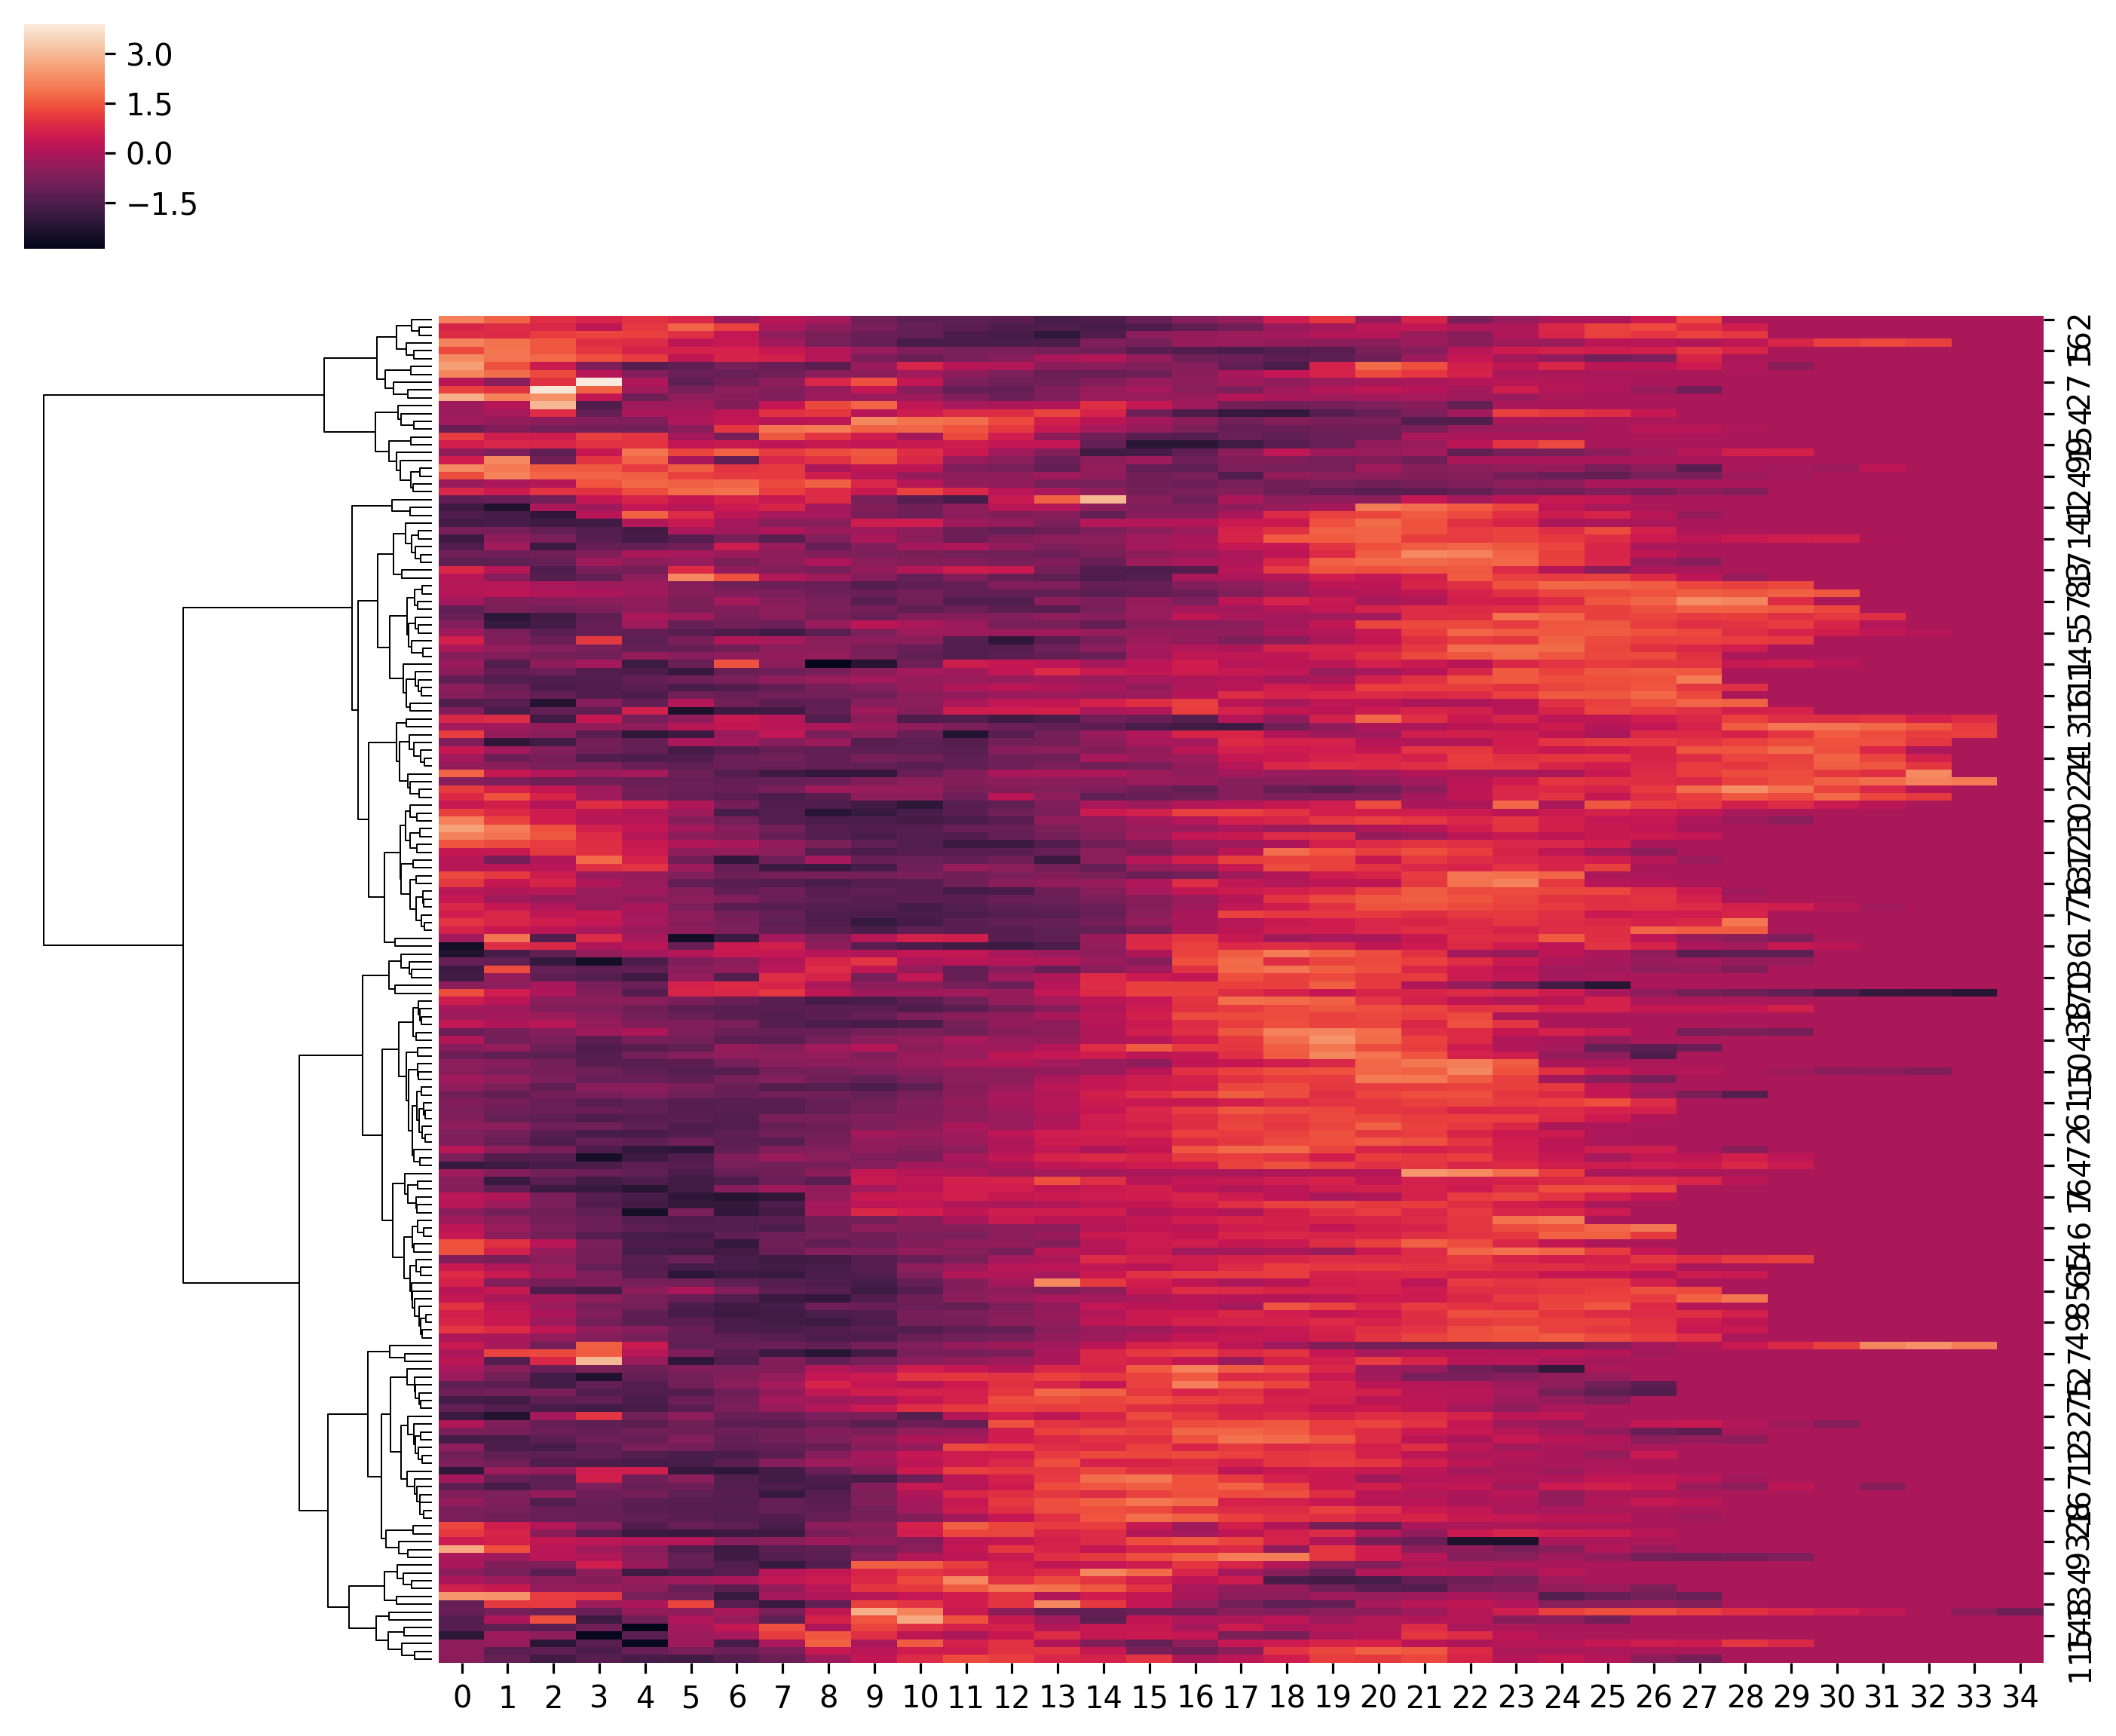

In [676]:
timeSeries = hr.drop("cycle_day", axis =1).T
plot_heatmap(timeSeries, "complete", "braycurtis", "rocket")

### Table of feature's clusters

In [22]:
def feature_clusters(hr,br,st,k, metric, method):
    br = pd.Series(plot_clustered_ts(br.drop("cycle_day", axis =1).T, k, method, metric, anim=True, plot = False)).rename("br")
    hr = pd.Series(plot_clustered_ts(hr.drop("cycle_day", axis =1).T, k, method, metric, anim=True, plot = False)).rename("hr")
    st = pd.Series(plot_clustered_ts(st.drop("cycle_day", axis =1).T, k, method, metric, anim=True, plot = False)).rename("st")
    
    
    #index = hr.drop("cycle_day",axis=1).T.reset_index()["index"]
    #print(index)
    
    
    df = pd.concat([hr,st,br], axis = 1)
    #df['hr-br'] = np.where(df['br']==df["hr"], 1, 0)
    #df['hr-st'] = np.where(df['br']==df["st"], 1, 0)
    print()
    #print("number of matches for hr and br:", sum(df["hr-br"]))
    #print("number of matches for hr and st:", sum(df["hr-st"]))
    
    return df

In [23]:
df = feature_clusters(hr,br,st,9,"euclidean","ward")

#plt.figure(figsize = (2,100))

s = df["hr"].values*100
b = df["br"].values*100
#plt.scatter(np.ones(len(df["hr"])),df["hr"].index,s, c="g")
#plt.scatter(2*np.ones(len(df["br"])),df["br"].index,b, c = "b",)



Using matplotlib backend: MacOSX
Cluster 3 - number of entries 12
Cluster 1 - number of entries 30
Cluster 4 - number of entries 6
Cluster 2 - number of entries 15
Cluster 6 - number of entries 38
Cluster 7 - number of entries 23
Cluster 9 - number of entries 22
Cluster 8 - number of entries 21
Cluster 5 - number of entries 5
Using matplotlib backend: MacOSX
Cluster 7 - number of entries 17
Cluster 4 - number of entries 38
Cluster 6 - number of entries 17
Cluster 8 - number of entries 12
Cluster 1 - number of entries 11
Cluster 3 - number of entries 34
Cluster 9 - number of entries 24
Cluster 2 - number of entries 13
Cluster 5 - number of entries 6
Using matplotlib backend: MacOSX
Cluster 3 - number of entries 19
Cluster 6 - number of entries 24
Cluster 5 - number of entries 20
Cluster 1 - number of entries 15
Cluster 8 - number of entries 16
Cluster 7 - number of entries 18
Cluster 9 - number of entries 30
Cluster 2 - number of entries 20
Cluster 4 - number of entries 10



## clusters for braycurtis & complete

In [24]:
n_cluster = 5
df = feature_clusters(hr,br,st,n_cluster,"braycurtis","complete")
df.T

Using matplotlib backend: MacOSX
Cluster 1 - number of entries 33
Cluster 5 - number of entries 103
Cluster 3 - number of entries 18
Cluster 4 - number of entries 12
Cluster 2 - number of entries 6
Using matplotlib backend: MacOSX
Cluster 5 - number of entries 41
Cluster 3 - number of entries 58
Cluster 4 - number of entries 50
Cluster 1 - number of entries 11
Cluster 2 - number of entries 12
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 72
Cluster 5 - number of entries 29
Cluster 4 - number of entries 58
Cluster 3 - number of entries 10
Cluster 1 - number of entries 3



,0,1,2,3,4,5,6,7,8,9,...,162,163,164,165,166,167,168,169,170,171
hr,5,3,4,3,3,1,3,4,4,4,...,1,2,4,4,3,5,4,3,4,3
st,2,5,4,2,2,4,3,5,4,2,...,2,5,3,4,5,2,4,5,4,5
br,1,1,1,5,1,5,1,5,3,5,...,5,4,4,5,5,5,5,5,3,5


In [25]:
from matplotlib import cm
fig = plt.figure(figsize= (20,10))
cmap = cm.get_cmap('tab10_r',n_cluster)
ax = sns.heatmap(df.sort_values(by=["hr","br","st"]).T, cmap=cmap, linewidths=0.0, method ="correlation")

AttributeError: Unknown property method

In [26]:
n_cluster = 4
df = feature_clusters(hr,br,st,n_cluster,"braycurtis","complete")


Using matplotlib backend: MacOSX
Cluster 1 - number of entries 33
Cluster 4 - number of entries 103
Cluster 2 - number of entries 24
Cluster 3 - number of entries 12
Using matplotlib backend: MacOSX
Cluster 4 - number of entries 41
Cluster 2 - number of entries 58
Cluster 3 - number of entries 50
Cluster 1 - number of entries 23
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 72
Cluster 4 - number of entries 87
Cluster 3 - number of entries 10
Cluster 1 - number of entries 3



In [27]:
fig = plt.figure(figsize= (20,10))
cmap = cm.get_cmap('tab10_r',n_cluster*3)
ax = sns.heatmap(df.sort_values(by=["hr","st","br"]).T, cmap=cmap, linewidths=0.0)

## euclidean & ward

In [28]:
n_cluster = 4
df = feature_clusters(hr,br,st,n_cluster,"euclidean","ward")
fig = plt.figure(figsize= (20,10))
cmap = cm.get_cmap('tab10_r',n_cluster)
ax = sns.heatmap(df.sort_values(by=["hr","st","br"]).T, cmap=cmap, linewidths=0.0)

Using matplotlib backend: MacOSX
Cluster 2 - number of entries 38
Cluster 1 - number of entries 30
Cluster 3 - number of entries 38
Cluster 4 - number of entries 66
Using matplotlib backend: MacOSX
Cluster 4 - number of entries 53
Cluster 2 - number of entries 72
Cluster 3 - number of entries 23
Cluster 1 - number of entries 24
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 29
Cluster 3 - number of entries 62
Cluster 1 - number of entries 35
Cluster 4 - number of entries 46



### Sankey Diagrams

In [29]:
def labeling(value):
    if value == 1:
        return "hr1"  
    elif value == 2:
        return "hr2"
    elif value == 3:
        return "hr3"
    
    elif value == 4:
        return "hr4"
    # Return np.nan    
    else:
        return np.nan

In [50]:
df = feature_clusters(hr,br,st,n_cluster,metric,method)

Using matplotlib backend: MacOSX
Cluster 1 - number of entries 33
Cluster 4 - number of entries 103
Cluster 2 - number of entries 24
Cluster 3 - number of entries 12
Using matplotlib backend: MacOSX
Cluster 4 - number of entries 41
Cluster 2 - number of entries 58
Cluster 3 - number of entries 50
Cluster 1 - number of entries 23
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 72
Cluster 4 - number of entries 87
Cluster 3 - number of entries 10
Cluster 1 - number of entries 3



In [253]:
def sankey(method, metric, n_cluster):

    df = feature_clusters(hr,br,st,n_cluster,metric,method)
    print(df)
    df["count"] = df["hr"]
    df1 = df.groupby(["hr","br"]).count().reset_index().drop("st", axis = 1)
    df1.columns = ["source", "target", "count"]
    df1["target"] += 3
    df1["source"] -= 1
    sum(df1["count"])

    df2 = df.groupby(["br","st"]).count().reset_index().drop("br", axis = 1)
    df2.columns = ["source", "target", "count"]
    df2["target"] += 7 
    df2["source"] += 3
    sum(df2["count"])

    df3 = df1.append(df2)

    sum(df3["count"])

    labels = pd.Series(["1","2","3","4","5","6","1","2","3","4","5","6","1","2","3","4","5","6"], name = "label")
    #print(labels)


    df_final = df3.reset_index()
    df_final = df_final.sort_values(["source", "target"])
    df_final = df_final.join(labels)
    print(df_final)

    import plotly.plotly as py
    %matplotlib inline
    data  = dict(
        type='sankey',
        width = 500,
        height = 7000,
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 6,
          thickness = 15,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = df_final["label"],
            color = ["crimson","crimson","crimson","crimson","crimson","crimson","darkblue","darkblue","darkblue","darkblue","darkblue","darkblue","orange","orange","orange","orange","orange","orange"]

        ),
        link = dict(
          source = df_final["source"],
          target = df_final["target"],
          value = df_final["count"]

      ))

    layout =  dict(
        title = metric + " - " + method+ " clusters",
        font = dict(
        size = 16,
        height = 1000,

        )
    )
    fig = dict(data=[data], layout=layout)
    iplot(fig, validate=False)
    
    return  df[["hr","br","st"]]

In [254]:
df = sankey("complete","braycurtis", 6)

Using matplotlib backend: MacOSX
Cluster 2 - number of entries 20
Cluster 1 - number of entries 13
Cluster 6 - number of entries 103
Cluster 4 - number of entries 18
Cluster 5 - number of entries 12
Cluster 3 - number of entries 6
Using matplotlib backend: MacOSX
Cluster 5 - number of entries 28
Cluster 3 - number of entries 58
Cluster 4 - number of entries 50
Cluster 1 - number of entries 11
Cluster 2 - number of entries 12
Cluster 6 - number of entries 13
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 12
Cluster 6 - number of entries 29
Cluster 5 - number of entries 58
Cluster 3 - number of entries 60
Cluster 4 - number of entries 10
Cluster 1 - number of entries 3

     hr  st  br
0     5   2   2
1     3   6   1
2     4   5   2
3     3   3   6
4     3   3   1
5     1   5   6
6     3   4   2
7     4   6   6
8     4   5   4
9     4   3   6
10    2   5   2
11    6   5   6
12    5   5   2
13    4   3   5
14    1   3   6
15    4   3   4
16    3   5   6
17    3   3   6
18 

In [246]:

df["count"] = df["hr"]
df1 = df.groupby(["hr","br"]).count().reset_index().drop("st", axis = 1)
df1.columns = ["source", "target", "count"]
df1["target"] += 3
df1["source"] -= 1
sum(df1["count"])

df2 = df.groupby(["br","st"]).count().reset_index().drop("br", axis = 1)
df2.columns = ["source", "target", "count"]
df2["target"] += 7 
df2["source"] += 3
sum(df2["count"])

df3 = df1.append(df2)

sum(df3["count"])

labels = pd.Series(["1","2","3","4","5","6","1","2","3","4","5","6","1","2","3","4","5","6"], name = "label")
#print(labels)


df_final = df3.reset_index()
df_final = df_final.sort_values(["source", "target"])
df_final.join(labels)

,index,source,target,count,label
0,0,0,4,1,1
1,1,0,5,1,2
2,2,0,7,2,3
3,3,0,8,2,4
4,4,0,9,5,5
5,5,1,4,1,6
6,6,1,5,3,1
7,7,1,8,1,2
8,8,1,9,7,3
9,9,2,4,7,4


In [315]:
def sankey1(method, metric, n_cluster):

    df = feature_clusters(hr,br,st,n_cluster,metric,method)
    df["count"] = df["hr"]
    df1 = df.groupby(["hr","br"]).count().reset_index().drop("st", axis = 1)
    df1.columns = ["source", "target", "count"]
    df1["target"] = df1["target"] +n_cluster -1
    df1["source"] = df1["source"] - 1
    sum(df1["count"])
    df2 = df.groupby(["br","st"]).count().reset_index().drop("hr", axis = 1)
    df2.columns = ["source", "target", "count"]
    df2["target"] = df2["target"] +(2*n_cluster) -1
    df2["source"] = df2["source"] +n_cluster - 1
    sum(df2["count"])
    df_final = df1.append(df2)
    labels = pd.Series(["1","2","3","4","5","6","1","2","3","4","5","6","1","2","3","4","5","6"], name = "label")
    df_final = df_final.reset_index()
    df_final["label"] = labels
   
    import plotly.plotly as py
    %matplotlib inline
    data  = dict(
        type='sankey',
        width = 500,
        height = 70,
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 3,
          thickness = 15,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = df_final["label"],
            color = ["#911A33","#911A33","#911A33","#911A33","#911A33","#911A33",\
                     "#5585A8","#5585A8","#5585A8","#5585A8","#5585A8","#5585A8",\
                     "#AE652E","#AE652E","#AE652E","#AE652E","#AE652E","#AE652E"]

        ),
        link = dict(
          source = df_final["source"],
          target = df_final["target"],
          value = df_final["count"]

      ))

    layout =  dict(
        title = metric + " - " + method+ " clusters",
        font = dict(
        size = 16,
        #height = 700,

        )
    )
    fig = dict(data=[data], layout=layout)
    iplot(fig, validate=False)
    
    #return  df[["hr","br","st"]]

In [316]:
sankey1("complete","braycurtis", 6)

Using matplotlib backend: MacOSX
Cluster 2 - number of entries 20
Cluster 1 - number of entries 13
Cluster 6 - number of entries 103
Cluster 4 - number of entries 18
Cluster 5 - number of entries 12
Cluster 3 - number of entries 6
Using matplotlib backend: MacOSX
Cluster 5 - number of entries 28
Cluster 3 - number of entries 58
Cluster 4 - number of entries 50
Cluster 1 - number of entries 11
Cluster 2 - number of entries 12
Cluster 6 - number of entries 13
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 12
Cluster 6 - number of entries 29
Cluster 5 - number of entries 58
Cluster 3 - number of entries 60
Cluster 4 - number of entries 10
Cluster 1 - number of entries 3



In [317]:
def sankey2(method, metric, n_cluster):

    df = feature_clusters(hr,br,st,n_cluster,metric,method)
    df["count"] = df["hr"]
    df1 = df.groupby(["hr","st"]).count().reset_index().drop("br", axis = 1)
    df1.columns = ["source", "target", "count"]
    df1["target"] = df1["target"] +n_cluster -1
    df1["source"] = df1["source"] - 1
    sum(df1["count"])
    df2 = df.groupby(["st","br"]).count().reset_index().drop("hr", axis = 1)
    df2.columns = ["source", "target", "count"]
    df2["target"] = df2["target"] +(2*n_cluster) -1
    df2["source"] = df2["source"] +n_cluster - 1
    sum(df2["count"])
    df_final = df1.append(df2)
    labels = pd.Series(["1","2","3","4","5","6","1","2","3","4","5","6","1","2","3","4","5","6"], name = "label")
    df_final = df_final.reset_index()
    df_final["label"] = labels
   
    import plotly.plotly as py
    %matplotlib inline
    data  = dict(
        type='sankey',
        width = 500,
        height = 70,
        domain = dict(
          x =  [0,1],
          y =  [0,1]
        ),
        orientation = "h",
        valueformat = ".0f",
        node = dict(
          pad = 3,
          thickness = 15,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = df_final["label"],
        color = ["#911A33","#911A33","#911A33","#911A33","#911A33","#911A33",\
                 "#AE652E","#AE652E","#AE652E","#AE652E","#AE652E","#AE652E",\
                     "#5585A8","#5585A8","#5585A8","#5585A8","#5585A8","#5585A8"]
        ),
        link = dict(
          source = df_final["source"],
          target = df_final["target"],
          value = df_final["count"]

      ))

    layout =  dict(
        title = metric + " - " + method+ " clusters",
        font = dict(
        size = 16,
        #height = 700,

        )
    )
    fig = dict(data=[data], layout=layout)
    iplot(fig, validate=False)
    
    #return  df[["hr","br","st"]]

In [322]:
sankey1("complete","braycurtis", 6)

Using matplotlib backend: MacOSX
Cluster 2 - number of entries 20
Cluster 1 - number of entries 13
Cluster 6 - number of entries 103
Cluster 4 - number of entries 18
Cluster 5 - number of entries 12
Cluster 3 - number of entries 6
Using matplotlib backend: MacOSX
Cluster 5 - number of entries 28
Cluster 3 - number of entries 58
Cluster 4 - number of entries 50
Cluster 1 - number of entries 11
Cluster 2 - number of entries 12
Cluster 6 - number of entries 13
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 12
Cluster 6 - number of entries 29
Cluster 5 - number of entries 58
Cluster 3 - number of entries 60
Cluster 4 - number of entries 10
Cluster 1 - number of entries 3



In [320]:
sankey2("complete","braycurtis", 6)

Using matplotlib backend: MacOSX
Cluster 2 - number of entries 20
Cluster 1 - number of entries 13
Cluster 6 - number of entries 103
Cluster 4 - number of entries 18
Cluster 5 - number of entries 12
Cluster 3 - number of entries 6
Using matplotlib backend: MacOSX
Cluster 5 - number of entries 28
Cluster 3 - number of entries 58
Cluster 4 - number of entries 50
Cluster 1 - number of entries 11
Cluster 2 - number of entries 12
Cluster 6 - number of entries 13
Using matplotlib backend: MacOSX
Cluster 2 - number of entries 12
Cluster 6 - number of entries 29
Cluster 5 - number of entries 58
Cluster 3 - number of entries 60
Cluster 4 - number of entries 10
Cluster 1 - number of entries 3



# PCA

In [419]:
df = pd.read_csv("Data/data_clean.csv")
pca_df = df[["hr_norm","br_norm","st_norm"]]

In [420]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
pca.fit(pca_df)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [421]:
pca_1d = pca.transform(pca_df)
pca_1d.shape

(4811, 1)

,Unnamed: 0,index,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan,PCA
0,56,56,360,2016-09-08,2016-10-11,1,34,2016-09-08,1,35.160000,49.382901,13.548148,3,-0.256382,0.474541,1.057628,0.413055,0.472952,0.926237,-0.735447
1,57,57,360,2016-09-08,2016-10-11,1,34,2016-09-09,2,33.990000,48.226595,13.886310,3,1.015113,-0.080389,-1.488611,0.712489,0.319647,0.402712,0.322059
2,58,58,360,2016-09-08,2016-10-11,1,34,2016-09-10,3,34.460000,46.629602,13.830592,3,0.805613,-0.846811,-0.465762,0.663153,0.107915,0.613017,0.278125
3,59,59,360,2016-09-08,2016-10-11,1,34,2016-09-11,4,33.090000,51.724209,14.211006,3,2.235978,1.598171,-3.447256,1.000000,0.783365,0.000000,-0.191581
4,60,60,360,2016-09-08,2016-10-11,1,34,2016-09-12,5,34.863000,49.416004,13.733557,3,0.440762,0.490427,0.411275,0.577231,0.477340,0.793342,-0.774029
5,61,61,360,2016-09-08,2016-10-11,1,34,2016-09-13,6,35.170000,45.815645,13.990477,3,1.406782,-1.237442,1.079391,0.804726,0.000000,0.930712,-0.756369
6,62,62,360,2016-09-08,2016-10-11,1,34,2016-09-14,7,34.168101,46.147938,13.688630,3,0.271835,-1.077969,-1.101014,0.537449,0.044056,0.482405,1.091464
7,63,63,360,2016-09-08,2016-10-11,1,34,2016-09-15,8,34.429740,46.281750,13.746961,3,0.491159,-1.013750,-0.531617,0.589100,0.061797,0.599477,0.594354
8,64,64,360,2016-09-08,2016-10-11,1,34,2016-09-16,9,35.053577,46.002524,13.720900,3,0.393172,-1.147755,0.826022,0.566024,0.024777,0.878617,-0.066428
9,65,65,360,2016-09-08,2016-10-11,1,34,2016-09-17,10,35.014793,46.617354,13.607724,3,-0.032375,-0.852689,0.741619,0.465809,0.106292,0.861263,0.065484


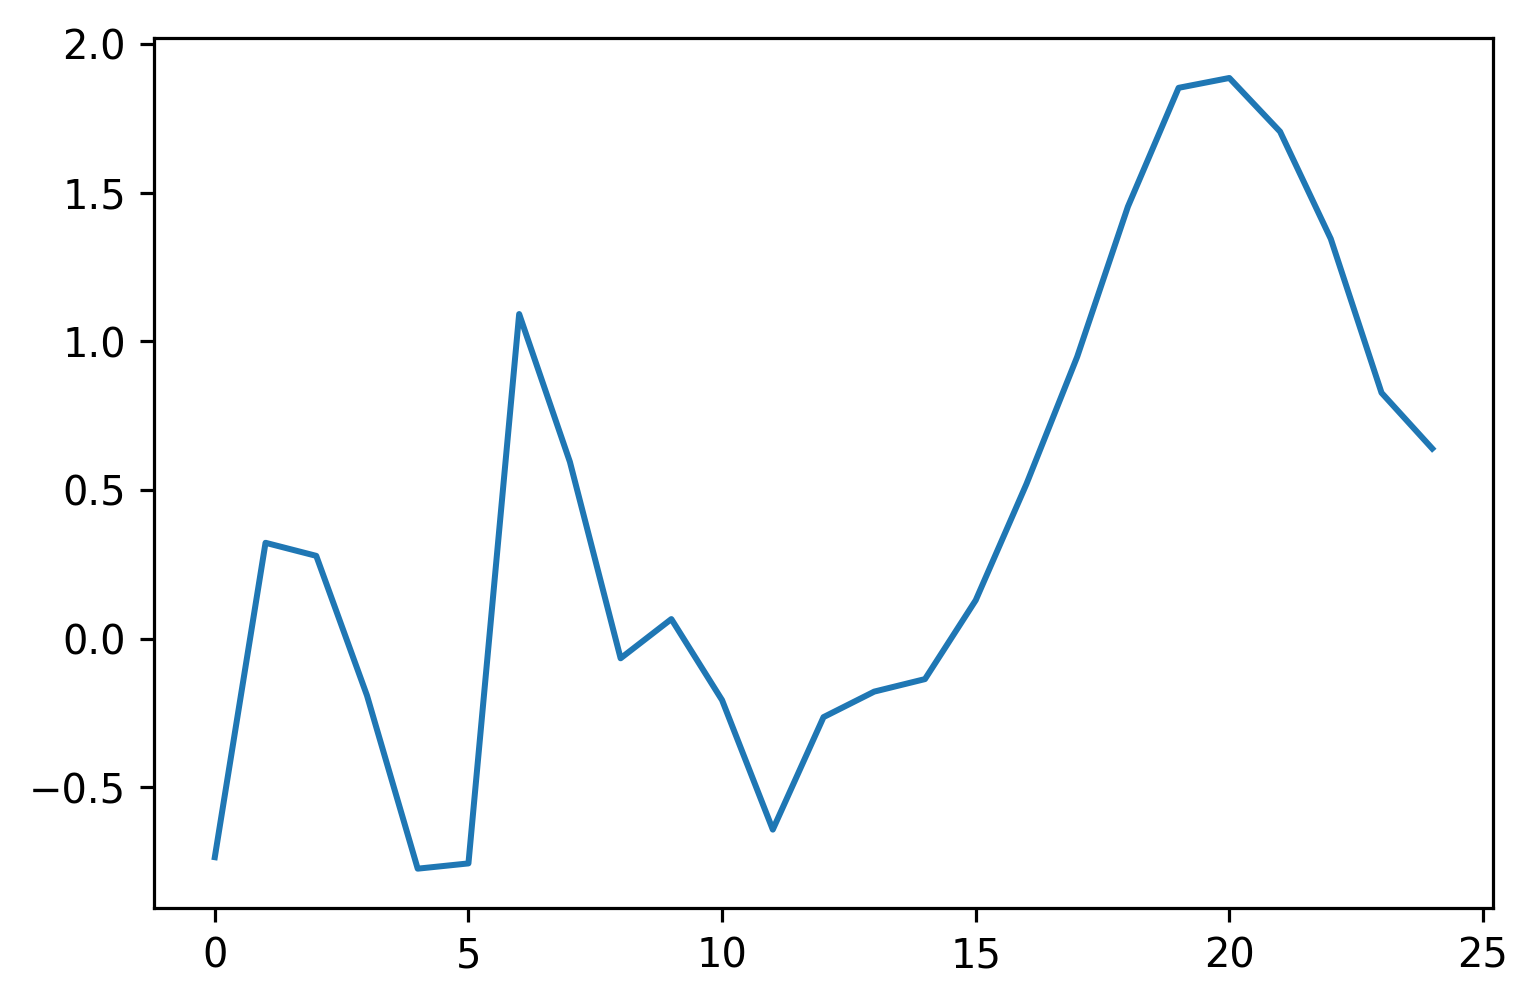

In [422]:
df["PCA"] = pca_1d
plt.plot(df["PCA"][:25])
df.to_csv("Data/Data_clean_pca.csv")
df

In [423]:
df = df.drop(["Unnamed: 0", "index"], axis =1)
print(df.head())
#group cycles by user and cycle number
groupby_cycles = df.groupby(["user","cycle_number"]).describe()
groupby_cycles.head()

groupby29 = groupby_cycles[groupby_cycles.cycle_length["mean"] == 29]


   user  first_date   last_date  cycle_number  cycle_length        date  \
0   360  2016-09-08  2016-10-11             1            34  2016-09-08   
1   360  2016-09-08  2016-10-11             1            34  2016-09-09   
2   360  2016-09-08  2016-10-11             1            34  2016-09-10   
3   360  2016-09-08  2016-10-11             1            34  2016-09-11   
4   360  2016-09-08  2016-10-11             1            34  2016-09-12   

   cycle_day  skin_temperature         hr         br  cycle_index   br_norm  \
0          1            35.160  49.382901  13.548148            3 -0.256382   
1          2            33.990  48.226595  13.886310            3  1.015113   
2          3            34.460  46.629602  13.830592            3  0.805613   
3          4            33.090  51.724209  14.211006            3  2.235978   
4          5            34.863  49.416004  13.733557            3  0.440762   

    hr_norm   st_norm   br_stan   hr_stan   st_stan       PCA  
0  0.47454

PCA                                              \
                   count          mean       std       min       25%   
user  cycle_number                                                     
406   6             29.0 -4.119310e-15  1.607498 -2.340458 -0.845334   
      8             29.0  1.754918e-14  1.390239 -2.883828 -1.059154   
      11            29.0 -9.469437e-15  1.383545 -2.508420 -1.236798   
411   5             29.0  3.186723e-14  1.424638 -1.545421 -1.382035   
      10            29.0  4.831384e-15  1.488783 -1.834444 -1.222816   
423   7             29.0 -3.062684e-16  1.516163 -2.614746 -1.095881   
466   1             29.0  1.172434e-14  1.493209 -3.509444 -0.956207   
487   7             29.0 -5.168280e-15  1.431482 -1.958651 -1.216567   
513   6             29.0 -2.028263e-14  1.288129 -2.520403 -1.021567   
      7             29.0 -7.848128e-17  1.546901 -2.279198 -1.760982   
      10            29.0 -2.890408e-16  1.430694 -2.793062 -1.533118   
827   1             29.0  2.174506e-15  1.371437 -1.579956 -1.111246   
      7             29.0  8.399411e-15  1.527537 -2.678113 -1.610724   
912   10            29.0 -1.546656e-15  1.627431 -2.689723 -1.301504   
950   5             29.0  1.980025e-14  1.489199 -2.133451 -1.426890   
4025  4             29.0  1.573837e-14  1.538009 -1.995031 -1.370776   
4039  3             29.0 -3.215818e-16  1.330306 -2.670334 -1.337326   
4569  5             29.0  1.558906e-14  1.298176 -2.482180 -1.053461   
4940  2             29.0 -3.200505e-15  1.370551 -2.888859 -0.903741   
4942  3             29.0 -9.651284e-15  1.220074 -3.380101 -0.861214   
5184  2             29.0  6.186622e-15  1.531773 -2.726570 -1.038058   
5448  3             29.0  2.489627e-14  1.460511 -2.728608 -1.300070   
5556  2             29.0 -4.700502e-15  1.431718 -3.081241 -0.487356   
5560  2             29.0 -6.163652e-15  1.432324 -2.282317 -1.139476   
15116 1             29.0 -1.139319e-14  1.180990 -2.164456 -0.565002   
15556 1             29.0  1.497174e-14  1.386075 -2.962993 -1.285169   

                                                    br            ...   \
                         50%       75%       max count       mean ...    
user  cycle_number                                                ...    
406   6            -0.328226  1.489412  2.305674  29.0  14.897954 ...    
      8             0.776543  1.057219  1.511857  29.0  14.783557 ...    
      11            0.243563  1.014937  2.159746  29.0  15.131831 ...    
411   5            -0.117733  1.151855  2.378193  29.0  18.537944 ...    
      10           -0.528649  1.511458  2.365797  29.0  18.473828 ...    
423   7             0.291945  1.449845  1.991304  29.0  15.790013 ...    
466   1            -0.223292  1.149179  2.752372  29.0  15.606980 ...    
487   7            -0.339424  1.027619  2.363841  29.0  13.057730 ...    
513   6             0.142439  0.899649  2.368372  29.0  14.982016 ...    
      7             0.371571  1.465850  2.413057  29.0  14.833622 ...    
      10            0.324078  1.220894  2.169111  29.0  14.852161 ...    
827   1            -0.022230  0.906354  4.179837  29.0  18.072317 ...    
      7             0.355771  1.424408  1.973249  29.0  16.544990 ...    
912   10           -0.006375  1.488529  2.016984  29.0  17.144095 ...    
950   5            -0.241938  1.391012  2.529219  29.0  14.502072 ...    
4025  4             0.148262  1.079946  2.916013  29.0  18.575083 ...    
4039  3             0.308027  1.019602  1.800691  29.0  16.842704 ...    
4569  5             0.114860  1.016583  2.190709  29.0  15.682182 ...    
4940  2             0.311897  0.924857  1.848815  29.0  19.367110 ...    
4942  3             0.275460  0.765595  1.885728  29.0  15.483232 ...    
5184  2            -0.241637  1.579638  2.334695  29.0  15.533175 ...    
5448  3             0.074243  1.221183  1.872238  29.0  17.047729 ...    
5556  2             0.306194  0.986901  2.196839  29.0  19.203475 ...    
5560  2 

In [426]:
groupby29 = groupby29.reset_index()

In [431]:
groupby_cycles = groupby_cycles.reset_index()

In [427]:
# time series data frame with complete cycles and regular length
pca29 = pd.DataFrame()
for user in np.unique(groupby29.user.values):
    for cycle in groupby29[groupby29.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        pca29 = pca29.append(df[(df["user"] == user)&(df["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])
        
        
pca29

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan,PCA
96,406,2017-02-11,2017-03-11,6,29,2017-02-11,1,35.563302,49.198451,14.881156,22,-0.065452,1.023190,0.304007,0.478757,0.762151,0.580706,-0.715420
97,406,2017-02-11,2017-03-11,6,29,2017-02-12,2,35.609623,48.680272,14.958099,22,0.234350,0.743017,0.496376,0.573113,0.689523,0.641340,-0.845334
98,406,2017-02-11,2017-03-11,6,29,2017-02-13,3,35.495952,48.391333,15.050972,22,0.596224,0.586792,0.024305,0.687006,0.649024,0.492546,-0.692959
99,406,2017-02-11,2017-03-11,6,29,2017-02-14,4,35.508462,47.956509,15.056546,22,0.617942,0.351688,0.076259,0.693841,0.588079,0.508921,-0.603668
100,406,2017-02-11,2017-03-11,6,29,2017-02-15,5,35.460924,47.128106,15.071107,22,0.674678,-0.096219,-0.121163,0.711697,0.471968,0.446695,-0.269296
101,406,2017-02-11,2017-03-11,6,29,2017-02-16,6,35.431218,46.274835,14.997775,22,0.388946,-0.557571,-0.244528,0.621769,0.352372,0.407811,0.229496
102,406,2017-02-11,2017-03-11,6,29,2017-02-17,7,35.293614,45.888742,14.928332,22,0.118365,-0.766327,-0.815992,0.536609,0.298257,0.227689,0.839133
103,406,2017-02-11,2017-03-11,6,29,2017-02-18,8,35.222904,45.037203,14.843286,22,-0.213009,-1.226743,-1.109646,0.432316,0.178904,0.135131,1.463598
104,406,2017-02-11,2017-03-11,6,29,2017-02-19,9,35.229098,44.614647,14.772826,22,-0.487552,-1.455214,-1.083924,0.345909,0.119677,0.143239,1.737620
105,406,2017-02-11,2017-03-11,6,29,2017-02-20,10,35.181982,43.760795,14.687718,22,-0.819168,-1.916880,-1.279595,0.241540,0.000000,0.081564,2.305663


In [432]:
# time series data frame with complete cycles and regular length
pca = pd.DataFrame()
for user in np.unique(groupby_cycles.user.values):
    for cycle in groupby_cycles[groupby_cycles.user == user].cycle_number.values:
        #print("user: ", user)
        #print("cycle: ", cycle)
        pca = pca.append(df[(df["user"] == user)&(df["cycle_number"] == cycle)])
        #print(gold[["user", "cycle_number", "date"]])
        
        
pca.head()

,user,first_date,last_date,cycle_number,cycle_length,date,cycle_day,skin_temperature,hr,br,cycle_index,br_norm,hr_norm,st_norm,br_stan,hr_stan,st_stan,PCA
0,360,2016-09-08,2016-10-11,1,34,2016-09-08,1,35.160,49.382901,13.548148,3,-0.256382,0.474541,1.057628,0.413055,0.472952,0.926237,-0.735447
1,360,2016-09-08,2016-10-11,1,34,2016-09-09,2,33.990,48.226595,13.886310,3,1.015113,-0.080389,-1.488611,0.712489,0.319647,0.402712,0.322059
2,360,2016-09-08,2016-10-11,1,34,2016-09-10,3,34.460,46.629602,13.830592,3,0.805613,-0.846811,-0.465762,0.663153,0.107915,0.613017,0.278125
3,360,2016-09-08,2016-10-11,1,34,2016-09-11,4,33.090,51.724209,14.211006,3,2.235978,1.598171,-3.447256,1.000000,0.783365,0.000000,-0.191581
4,360,2016-09-08,2016-10-11,1,34,2016-09-12,5,34.863,49.416004,13.733557,3,0.440762,0.490427,0.411275,0.577231,0.477340,0.793342,-0.774029


In [433]:
value_PCA = "PCA"

PCA_ = pca[["cycle_day", value_PCA, "cycle_index"]]
PCA_29 = pca29[["cycle_day", value_PCA, "cycle_index"]]

PCA = PCA_.pivot_table(index = "cycle_day", columns="cycle_index", values = value_PCA).fillna(0)
PCA29 = PCA_29.pivot_table(index = "cycle_day", columns="cycle_index", values = value_PCA).fillna(0)

PCA.to_csv("Data/PCA_all.csv")
PCA29.to_csv("Data/PCA_29.csv")
PCA29

cycle_index,22,24,27,52,57,81,126,175,210,211,...,490,542,625,633,651,692,719,725,780,782
cycle_day,,,,,,,,,,,,,,,,,,,,,
1,-0.715420,-0.919104,-2.144520,-1.332248,-0.528649,-1.095881,1.149179,-1.438066,0.725983,-2.279198,...,-2.670334,-1.335987,-0.098304,-0.959936,-1.658249,1.181387,-2.850768,0.260221,-2.164456,1.485683
2,-0.845334,-0.446998,-2.508420,-0.895255,-1.094219,-0.828045,2.151783,-0.614053,0.152295,-1.803060,...,-2.113507,-1.278667,0.066035,-0.478919,-1.848679,1.499954,-3.081241,1.824445,-0.565002,-1.643258
3,-0.692959,0.199368,-1.792475,0.204884,-0.722049,-0.237653,0.961291,0.313160,0.142467,0.012114,...,-1.768853,-0.937187,0.082850,-0.926909,-1.632675,1.221183,-2.778847,2.320871,0.257106,2.054860
4,-0.603668,0.776543,-1.021593,0.776298,-1.326740,0.291945,1.416951,0.695863,0.037155,0.780990,...,-1.709786,0.003627,0.536458,-0.861214,-0.312182,1.413818,-2.123457,2.185567,-1.637695,1.457142
5,-0.269296,1.057219,-0.409233,1.604788,-0.072070,0.587133,1.731200,1.573755,0.581555,0.917806,...,-1.337326,0.773731,0.311897,-1.260930,-0.857560,1.798463,-1.751843,1.663484,0.565664,1.369926
6,0.229496,1.511857,0.188868,2.013725,0.618750,0.583106,2.752372,2.363841,0.855573,1.577276,...,-1.295287,1.236422,0.628732,-2.031486,-1.038058,1.438329,-1.174629,-0.575366,0.058602,-0.022665
7,0.839133,1.257094,0.243563,2.378193,0.973887,1.202071,2.344285,2.124390,-1.161597,1.909673,...,-0.503805,1.763115,0.914889,-3.380101,-0.463772,1.872238,-0.107907,-0.087857,2.390878,1.013855
8,1.463598,1.169302,0.482585,2.147254,1.360995,1.449845,2.042237,2.209269,-2.080177,1.989415,...,0.308027,2.190709,1.078835,-1.891011,0.388917,1.628356,0.612703,1.099391,2.478962,0.588538
9,1.737620,1.278302,0.527323,2.037970,1.956333,1.611562,1.547798,2.037625,-2.520403,1.224657,...,0.911860,2.160042,1.314617,-1.128219,1.253277,1.066141,0.986901,0.877609,2.016532,-0.658602


In [438]:
feature = "PCA cycles"
cycle_length = "29"
timeSeries = PCA29.reset_index().drop("cycle_day", axis =1).T
timeSeries

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
cycle_index,,,,,,,,,,,,,,,,,,,,,
22,-0.715420,-0.845334,-0.692959,-0.603668,-0.269296,0.229496,0.839133,1.463598,1.737620,2.305663,...,-0.439861,-0.654876,-0.726014,-1.651086,-2.162912,-2.274148,-2.334905,-2.166189,-1.870328,-2.340458
24,-0.919104,-0.446998,0.199368,0.776543,1.057219,1.511857,1.257094,1.169302,1.278302,0.974034,...,0.409708,-0.354353,-1.059154,-1.361853,-1.597311,-1.804933,-2.084790,-2.328329,-2.694583,-2.883828
27,-2.144520,-2.508420,-1.792475,-1.021593,-0.409233,0.188868,0.243563,0.482585,0.527323,0.726746,...,1.014937,0.481943,0.193569,-0.736089,-1.609425,-2.030420,-1.903723,-1.382421,-1.236798,-0.446416
52,-1.332248,-0.895255,0.204884,0.776298,1.604788,2.013725,2.378193,2.147254,2.037970,1.912487,...,-1.147556,-1.191294,-1.321228,-1.498548,-1.385508,-1.382035,-1.401115,-1.522898,-1.195460,-1.523228
57,-0.528649,-1.094219,-0.722049,-1.326740,-0.072070,0.618750,0.973887,1.360995,1.956333,1.781071,...,-1.083284,-1.458741,-1.118537,-1.420797,-1.769981,-1.822962,-1.725913,-1.834444,-1.211811,-1.222816
81,-1.095881,-0.828045,-0.237653,0.291945,0.587133,0.583106,1.202071,1.449845,1.611562,1.710298,...,-0.758976,-0.878420,-0.990398,-1.528070,-2.459999,-2.614746,-2.164677,-2.501055,-1.787148,-1.371179
126,1.149179,2.151783,0.961291,1.416951,1.731200,2.752372,2.344285,2.042237,1.547798,-0.227712,...,0.080264,0.340825,-0.109006,-0.241457,-0.682360,-0.873726,-1.046540,-1.188157,-1.036957,-0.223292
175,-1.438066,-0.614053,0.313160,0.695863,1.573755,2.363841,2.124390,2.209269,2.037625,2.266313,...,-0.339424,-0.847510,-0.922986,-1.216567,-1.305647,-1.763685,-1.798659,-1.721618,-1.958651,-1.753977
210,0.725983,0.152295,0.142467,0.037155,0.581555,0.855573,-1.161597,-2.080177,-2.520403,-1.813597,...,1.368590,0.899649,0.568749,-0.502257,-0.778551,-0.710001,-1.332686,-1.349296,-1.021567,-0.660950


In [439]:
k = 9
method = "complete"
metric = "braycurtis"
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



array([3, 3, 7, 3, 3, 3, 1, 3, 5, 3, 3, 2, 3, 3, 4, 4, 7, 3, 4, 6, 7, 4, 9,
       4, 8, 4], dtype=int32)

In [440]:
feature = "PCA cycles"
cycle_length = "20 - 36"
timeSeries = PCA.reset_index().drop("cycle_day", axis =1).T


k = 9
method = "complete"
metric = DTWDistance
#plot_dendro(timeSeries, method, metric, k, feature, cycle_length)
plot_clustered_ts(timeSeries, k, method, metric, anim=True, plot = True)

Using matplotlib backend: MacOSX


/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



array([7, 6, 4, 3, 3, 3, 6, 9, 5, 3, 7, 9, 5, 9, 3, 9, 9, 3, 9, 9, 5, 9, 5,
       6, 6, 9, 1, 3, 5, 3, 3, 4, 3, 3, 9, 9, 5, 4, 9, 9, 9, 8, 3, 2, 5, 9,
       6, 3, 8, 3, 9, 3, 4, 3, 9, 9, 9, 3, 5, 9, 9, 9, 4, 9, 5, 9, 8, 6, 3,
       6, 9, 9, 5, 9, 8, 4, 9, 3, 5, 9, 5, 8, 5, 9, 9, 9, 9, 3, 3, 1, 3, 9,
       4, 5, 5, 3, 8, 9, 5, 3, 9, 3, 3, 9, 5, 9, 4, 9, 2, 9, 3, 9, 3, 6, 6,
       4, 3, 9, 3, 9, 5, 9, 3, 3, 1, 5, 1, 3, 9, 3, 9, 4, 5, 7, 5, 9, 9, 3,
       8, 3, 9, 3, 9, 9, 9, 9, 3, 1, 3, 5, 9, 9, 3, 3, 9, 8, 8, 6, 3, 9, 9,
       3, 3, 2, 5, 9, 3, 3, 9, 3, 9, 9], dtype=int32)

In [447]:
from dtaidistance import dtw
s1 = [0, 0, 1, 2, 1, 0, 1, 0, 0]
s2 = [0, 1, 2, 0, 0, 0, 0, 0, 0]
distance, paths = dtw.warping_paths(s1, s2)
print(distance)
print(paths)

1.41421356237
[[ 0.                 inf         inf         inf         inf         inf
          inf         inf         inf         inf]
 [        inf  0.          1.          2.23606798  2.23606798  2.23606798
   2.23606798  2.23606798  2.23606798  2.23606798]
 [        inf  0.          1.          2.23606798  2.23606798  2.23606798
   2.23606798  2.23606798  2.23606798  2.23606798]
 [        inf  1.          0.          1.          1.41421356  1.73205081
   2.          2.23606798  2.44948974  2.44948974]
 [        inf  2.23606798  1.          0.          2.          2.44948974
   2.64575131  2.82842712  3.          3.16227766]
 [        inf  2.44948974  1.          1.          1.          1.41421356
   1.73205081  2.          2.23606798  2.44948974]
 [        inf  2.44948974  1.41421356  2.23606798  1.          1.          1.
   1.          1.          1.        ]
 [        inf  2.64575131  1.41421356  1.73205081  1.41421356  1.41421356
   1.41421356  1.41421356  1.41421356  1.4142